In [75]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ensemble 모델

## [P.1] Bagging 모델

먼저, 결정 트리 기반의 bagging 알고리즘을 구현할 것임

In [76]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [77]:
X, y = make_moons(n_samples=1000, noise=0.50)
X_train, X_test, y_train, y_test = train_test_split(X, y)

결정 트리를 기반으로 하기 때문에 이전의 `DecisionTreeClassifier` 클래스를 [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)로 감싸서 모델을 구현함

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [79]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100, max_samples=0.2, bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.836

위의 성능을 단순한 결정 트리 모델 성능과 비교해보기

In [81]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.804

학습된 두 모델의 시각화를 해보면 다음과 같음


In [82]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "o")
    
    if show:
        plt.show()

In [87]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(-3, 4, 100)
        x1 = np.linspace(-3, 4, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)
        
    
    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

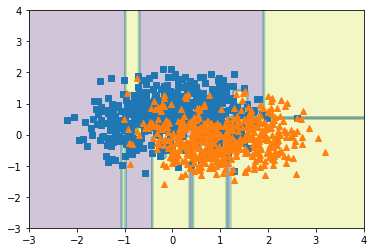

In [88]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(tree_clf)

plt.show()

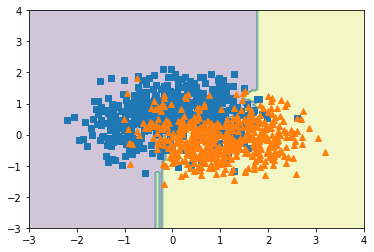

In [89]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(bag_clf)

plt.show()

확실히 결정 경계가 더 단순해진 것을 통해, 여러 트리의 앙상블로 분산 오류가 줄어든 것을 볼 수 있음

## [P.2] Random Forest 모델

트리 모델 간의 상관 관계를 줄여 앙상블 효과를 극대화하는 Random Forest 모델을 구현하고 성능을 평가해볼 것임     
사이킷런에서 제공하는 [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 클래스를 사용하면 됨

In [90]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.844

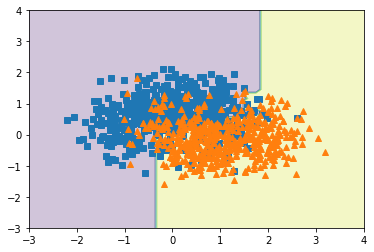

In [91]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(rnd_clf)

plt.show()

Bagging tree의 장점은 각 피처들의 중요도를 계산해, 모델에 대한 설명가능성을 키워줄 수 있음    
이는 `feature_importances_` 메써드를 활용하면 쉽게 알 수 있음

In [92]:
rnd_clf.feature_importances_

array([0.45694736, 0.54305264])

In [93]:
from sklearn.datasets import load_iris

data = load_iris()
X_iris, y_iris = data['data'], data['target']

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_iris, y_iris)

for feat, score in zip(data['feature_names'], rnd_clf.feature_importances_):
    print('The importance score of feature %s is about %.3f' % (feat, score))

The importance score of feature sepal length (cm) is about 0.106
The importance score of feature sepal width (cm) is about 0.026
The importance score of feature petal length (cm) is about 0.435
The importance score of feature petal width (cm) is about 0.433


## [P.3] AdaBoost 모델

이번에는 Boosting 알고리즘인 `AdaBoost`를 활용해 모델을 구현해볼 것임     
사이킷런에서 제공하는 [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) 클래스를 사용하면 쉽게 구현 가능함     

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.86

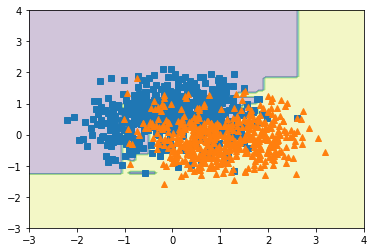

In [125]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(ada_clf)

plt.show()

### Q1. Bagging과 Boosting의 차이가 무엇일까요?

### Q2. AdaBoost에서 `DecisionTreeClassifier`의 `max_depth` argument를 1로 설정해준 이유는?

### Q3. AdaBoost 모델이 만약 학습 데이터셋에 underfit된 상황이라면, 어떤 하이퍼파라미터를 사용할 수 있을까요?